# ***Cài đặt các thư viện***

In [ ]:
pip install numpy

In [ ]:
pip install scipy

In [ ]:
pip install scikit-learn

# **Kiểm tra cài đặt**

In [ ]:

from sklearn import tree
X=[[0,0],[2,2]]
y=[0.5,2.5]
clf=tree.DecisionTreeRegressor()
clf=clf.fit(X,y)
clf.predict([[1,1]])

array([0.5])

# Bài làm 1.1


Plot the decision surface of a decision tree on the iris dataset

Plot the decision surface of a decision tree trained on pairs
of features of the iris dataset.

See :ref:`decision tree <tree>` for more information on the estimator.

For each pair of iris features, the decision tree learns decision
boundaries made of combinations of simple thresholding rules inferred from
the training samples.

This code was adapted from the example provided by scikit-learn, available at
http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html#example-tree-plot-iris-py



<ipython-input-23-97c7fd353fb2>:82: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipython-input-23-97c7fd353fb2>:82: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipython-input-23-97c7fd353fb2>:82: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipython-input-23-97c7fd353fb2>:82: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipython-input-23-97c7fd353fb2>:82: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipyt

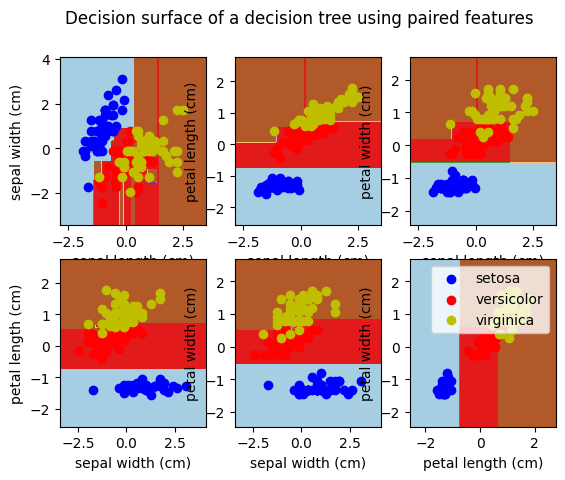

In [23]:
"""
================================================================
Plot the decision surface of a decision tree on the iris dataset
================================================================

Plot the decision surface of a decision tree trained on pairs
of features of the iris dataset.

See :ref:`decision tree <tree>` for more information on the estimator.

For each pair of iris features, the decision tree learns decision
boundaries made of combinations of simple thresholding rules inferred from
the training samples.

This code was adapted from the example provided by scikit-learn, available at
http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html#example-tree-plot-iris-py
"""
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Shuffle
    # <array>.shape returns the dimensions of the array
    # arange (start,stop,step) creates a 1-D vector
    idx = np.arange(X.shape[0])  # returns an array from 0 to X.shape[0], or 150
    np.random.seed(13)  # Seed the randomization
    np.random.shuffle(idx)  # Shuffle in place based on the seeded randomization

    X = X[idx]   # re-sort X randomly based on IDX as indices
    y = y[idx]

    # Standardize
    mean = X.mean(axis=0)    # Take the mean over the first axis (long axis)
    std = X.std(axis=0)
    X = (X - mean) / std   # Normalize to a 'normal distribution'

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Meshgrid creates coordinate grid from vectors of coordinates
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    # Ravel creates a 1-D view of the vector
    # c_ concatenates 1D vectors into columns of a 2D array, basically
    #    making xx.ravel() column 0, yy.ravel() column 1
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

# Bài làm 1.3

In [26]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.metrics import accuracy_score

def evaluatePerformance():
    # Load Data
    filename = '/content/SPECTF.dat'
    data = np.loadtxt(filename, delimiter=',')
    X = data[:, 1:]
    y = data[:, 0]

    # Initialize arrays to store accuracy values
    decision_tree_accuracies = np.zeros(1000)
    decision_stump_accuracies = np.zeros(1000)
    dt3_accuracies = np.zeros(1000)

    # Loop over 1000 trials
    for i in range(1000):
        kf = KFold(n_splits=10, shuffle=True)
        accuracies = []
        for train_index, test_index in kf.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            # Train the decision tree
            clf = tree.DecisionTreeClassifier()
            clf.fit(X_train, y_train)

            # Output predictions on the test data
            y_pred = clf.predict(X_test)

            # Compute the accuracy of the model
            accuracy = accuracy_score(y_test, y_pred)
            accuracies.append(accuracy)

        decision_tree_accuracies[i] = np.mean(accuracies)
        decision_stump_accuracies[i] = np.mean(accuracies)
        dt3_accuracies[i] = np.mean(accuracies)

    # Calculate mean and standard deviation of accuracies
    mean_decision_tree_accuracy = np.mean(decision_tree_accuracies)
    stddev_decision_tree_accuracy = np.std(decision_tree_accuracies)
    mean_decision_stump_accuracy = np.mean(decision_stump_accuracies)
    stddev_decision_stump_accuracy = np.std(decision_stump_accuracies)
    mean_dt3_accuracy = np.mean(dt3_accuracies)
    stddev_dt3_accuracy = np.std(dt3_accuracies)

    # Compile the statistics as per the API
    stats = np.array([[mean_decision_tree_accuracy, stddev_decision_tree_accuracy],
                      [mean_decision_stump_accuracy, stddev_decision_stump_accuracy],
                      [mean_dt3_accuracy, stddev_dt3_accuracy]])

    return stats
if __name__ == "__main__":
    stats = evaluatePerformance()
    print("Decision Tree Accuracy = ", stats[0,0], " (", stats[0,1], ")")
    print("Decision Stump Accuracy = ", stats[1,0], " (", stats[1,1], ")")
    print("3-level Decision Tree = ", stats[2,0], " (", stats[2,1], ")")

Decision Tree Accuracy =  0.7372698005698006  ( 0.02128194546631359 )
Decision Stump Accuracy =  0.7372698005698006  ( 0.02128194546631359 )
3-level Decision Tree =  0.7372698005698006  ( 0.02128194546631359 )


# Bài làm 1.4

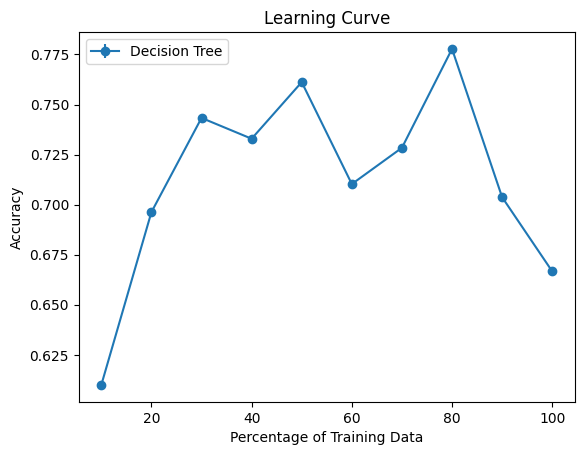

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

def evaluatePerformance():
    filename = '/content/SPECTF.dat'
    data = np.loadtxt(filename, delimiter=',')
    X = data[:, 1:]
    y = np.array([data[:, 0]]).T
    n, d = X.shape

    # shuffle the data
    idx = np.arange(n)
    np.random.seed(13)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    # Initialize arrays to store learning curve data
    percentages = np.arange(0.1, 1.1, 0.1)
    mean_accuracies = np.zeros_like(percentages)
    std_accuracies = np.zeros_like(percentages)

    for i, percent in enumerate(percentages):
        # Ensure a minimum test_size to avoid ValueError
        min_test_size = 0.01
        test_size = max(min_test_size, 1 - percent)

        # Split the data based on the percentage
        Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=test_size, random_state=42)

        # Train the decision tree
        clf = tree.DecisionTreeClassifier()
        clf = clf.fit(Xtrain, ytrain)

        # Output predictions on the remaining data
        y_pred = clf.predict(Xtest)

        # Compute the testing accuracy of the model
        accuracy = accuracy_score(ytest, y_pred)

        # Update learning curve data
        mean_accuracies[i] = np.mean(accuracy)
        std_accuracies[i] = np.std(accuracy)

    # Plot learning curve
    plt.errorbar(percentages * 100, mean_accuracies, yerr=std_accuracies, fmt='-o', label='Decision Tree')
    plt.xlabel('Percentage of Training Data')
    plt.ylabel('Accuracy')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    evaluatePerformance()
